<a href="https://colab.research.google.com/github/SoYeoni621/mulcam/blob/master/02_16_Wed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 신경망 학습(책 4장)

In [1]:
import numpy as np

In [2]:
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

In [8]:
def sum_squares_error(y, t):
  return 0.5 * np.sum((y-t)**2)

In [9]:
sum_squares_error(np.array(y), np.array(t))

0.09750000000000003

In [11]:
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
sum_squares_error(np.array(y), np.array(t))

0.2725

# 교차 엔트로피

In [26]:
def cross_entropy(Y, P):
  P = np.array(P)
  Y = np.array(Y)
  return -np.sum(Y * np.log(P) + (1-Y) * np.log(1-P)).round(3)

In [13]:
P = [[0.6, 0.2, 0.9, 0.3], [0.7, 0.9, 0.2, 0.4]]
Y = [[1., 1., 0., 0.], [1., 1., 0., 0.]]

In [27]:
for p, y in zip(P,Y):
  print(cross_entropy(y,p))

4.78
1.196


In [28]:
def cross_entropy_error(y, t):
  delta = 1e-7
  return -np.sum(t * np.log(y + delta))

In [30]:
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

cross_entropy_error(np.array(y), np.array(t))

0.510825457099338

In [31]:
y = [0.1, 0.05, 0.4, 0.0, 0.05, 0.1, 0.0, 0.3, 0.0, 0.0]

cross_entropy_error(np.array(y), np.array(t))

0.9162904818741863

In [32]:
def cross_entropy_error_error(y, t):
  if y.ndim == 1:
    t = t.reshape(1, t.size)
    y = y.reshape(1, y.size) # 1차원이면 나눌 batch가 없으므로 2차원으로 만들어준다.
  batch_size = y.shape[0]

  delta = 1e-7
  return -np.sum(t * np.log(y + delta))/batch_size

In [41]:
def numerical_diff(f, x):
  h = 1e-4
  return (f(x+h) - f(x)) / h

In [43]:
def numerical_diff(f, x):
  h = 1e-4
  return (f(x+h) - f(x-h)) / (2*h)

In [37]:
def func_1(x):
  return 0.01*x**2 + 0.1*x

In [42]:
numerical_diff(func_1, 5)

0.20000099999917254

In [44]:
numerical_diff(func_1, 5)

0.1999999999990898

In [45]:
import matplotlib.pylab as plt

In [46]:
def tangent_line(f, x):
  d = numerical_diff(f, x)
  y = f(x) - d*x
  return lambda t: d*t + y

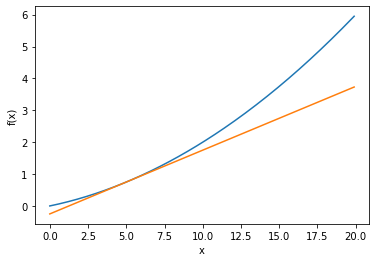

In [48]:
x = np.arange(0.0, 20.0, 0.1)
y = func_1(x)

# 접선의 기울기
tf = tangent_line(func_1, 5)
y2 = tf(x)

plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x, y)
plt.plot(x, y2)
plt.show()

In [49]:
def func_2(x):
  return x[0]**2 + x[1]**2

# 편미분

In [50]:
def numerical_gradient(f, x):
  h = 1e-4
  grad = np.zeros_like(x) #x와 같은 배열 생성

  for idx in range(x.size):
    tmp_val = x[idx]

    #f(x+h)
    x[idx] = float(tmp_val) + h
    fxh1 = f(x)

    #f(x-h)
    x[idx] = float(tmp_val) - h
    fxh2 = f(x)

    grad[idx] = (fxh1 - fxh2) / (2*h)  #미분/기울기
    x[idx] = tmp_val   # 값 복원
 
  return grad

In [51]:
numerical_gradient(func_2, np.array([3.0, 4.0]))

array([6., 8.])

# 경사하강법🤔

In [52]:
def gradient_descent(f, init_x, lr=0.01, step_num=100):
  x = init_x
  x_history = []

  for i in range(step_num):
    x_history.append(x.copy())

    grad = numerical_gradient(f, x)
    x -= lr*grad # x = x - lr*grad

  return x, np.array(x_history)

In [53]:
init_x = np.array([-3.0, 4.0]) # 초기 weight값

lr = 0.1
step_num = 100
x, x_history = gradient_descent(func_2, init_x, lr=lr, step_num=step_num)


In [54]:
x

array([-6.11110793e-10,  8.14814391e-10])

In [58]:
np.set_printoptions(formatter={'float_kind':lambda x: "{0:0.5f}".format(x)})

In [ ]:
x_history

In [60]:
def softmax(x):
  exp_x = np.exp(x)
  sum_exp_x = np.sum(exp_x)
  y = exp_x / sum_exp_x

  return y

In [61]:
def _numerical_gradient_no_batch(f, x):
  h = 1e-4
  grad = np.zeros_like(x) #x와 같은 배열 생성

  for idx in range(x.size):
    tmp_val = x[idx]

    #f(x+h)
    x[idx] = float(tmp_val) + h
    fxh1 = f(x)

    #f(x-h)
    x[idx] = float(tmp_val) - h
    fxh2 = f(x)

    grad[idx] = (fxh1 - fxh2) / (2*h)  #미분/기울기
    x[idx] = tmp_val   # 값 복원
 
  return grad

In [62]:
def numerical_gradient(f, X):
  if X.ndim == 1:
    return _numerical_gradient_no_batch(f, X)
  else:
    grad = np.zeros_like(X)

    for idx, x in enumerate(X):
      grad[idx] = _numerical_gradient_no_batch(f, x)

    return grad

In [63]:
from re import T
class SimpleNet:
  def __init__(self):
    self.W = np.random.rand(2,3)

  def predict(self, x):
    return np.dot(x, self.W)

  def loss(self, x, t):    #t가 라벨 
    z = self.predict(x)
    y = softmax(z)
    loss = cross_entropy_error(y, t)

    return loss   

In [64]:
net = SimpleNet()
net.W

array([[0.87852, 0.91313, 0.53130],
       [0.30967, 0.44956, 0.85355]])

In [65]:
x = np.array([0.6, 0.9])

In [66]:
p = net.predict(x)
p  # 처음 p

array([0.80581, 0.95248, 1.08697])

In [67]:
np.argmax(p)  #최댓값의 인덱스

2

In [68]:
t = np.array([0, 0, 1])  # 정답 레이블
net.loss(x, t)

0.9666295121165748

In [69]:
def f(W):
  return net.loss(x, t)

In [70]:
dw = numerical_gradient(f, net.W)
print(dw)

[[0.17228 0.19950 -0.37178]
 [0.25842 0.29925 -0.55767]]


In [72]:
dw = numerical_gradient(lambda w: net.loss(x, t), net.W)
dw

array([[0.17228, 0.19950, -0.37178],
       [0.25842, 0.29925, -0.55767]])

In [73]:
net.W = net.W - 0.001 * dw  #learning rate=0.001, 새로운 w가 업데이트된다

In [74]:
net.W -= 0.001 * dw

In [75]:
p = net.predict(x)
p # 2번째 p

array([0.80514, 0.95171, 1.08842])

In [76]:
np.argmax(p)

2

In [77]:
net.loss(x, t)

0.965280000486026

In [87]:
dw = numerical_gradient(lambda w: net.loss(x, t), net.W)
net.W -= 0.001 * dw
net.loss(x, t)

0.9585673838486508

In [90]:
dw

array([[0.17155, 0.19854, -0.37009],
       [0.25733, 0.29781, -0.55513]])